In [1]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [5]:
x_train=x_train.astype('float')
x_test=x_test.astype('float32')

In [6]:
x_train/=255
x_test/=255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
model=Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1966 - accuracy: 0.9408
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0811 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0576 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0445 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0335 - accuracy: 0.9889
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0293 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0259 - accuracy: 0.9912
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0212 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0196 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 18s 10ms/st

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9855


[0.06135346740484238, 0.9854999780654907]

In [12]:
y_predict=model.predict(x_test)

In [13]:
y_predict

array([[9.81864872e-13, 6.55876395e-11, 1.17583765e-09, ...,
        9.99999881e-01, 2.11370244e-12, 4.28078728e-09],
       [5.72543152e-13, 1.22123278e-09, 1.00000000e+00, ...,
        1.10764755e-21, 3.29366313e-17, 3.36783129e-20],
       [1.09705338e-08, 9.99988198e-01, 1.38191263e-08, ...,
        2.30134492e-06, 7.54057464e-06, 2.64867839e-09],
       ...,
       [1.38866404e-23, 6.36392860e-17, 7.11958473e-21, ...,
        1.85850890e-10, 5.06525117e-12, 3.52454212e-11],
       [1.11906461e-17, 4.02775707e-16, 3.53111887e-22, ...,
        9.79783399e-21, 1.16921171e-06, 3.44140067e-19],
       [1.04210686e-15, 8.83974627e-19, 2.14941433e-12, ...,
        5.54139470e-22, 1.01361826e-16, 5.57572391e-22]], dtype=float32)

In [31]:
import numpy as np
y_predict=np.argmax(y_predict,axis=0)

In [36]:
y_predict

7

In [41]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

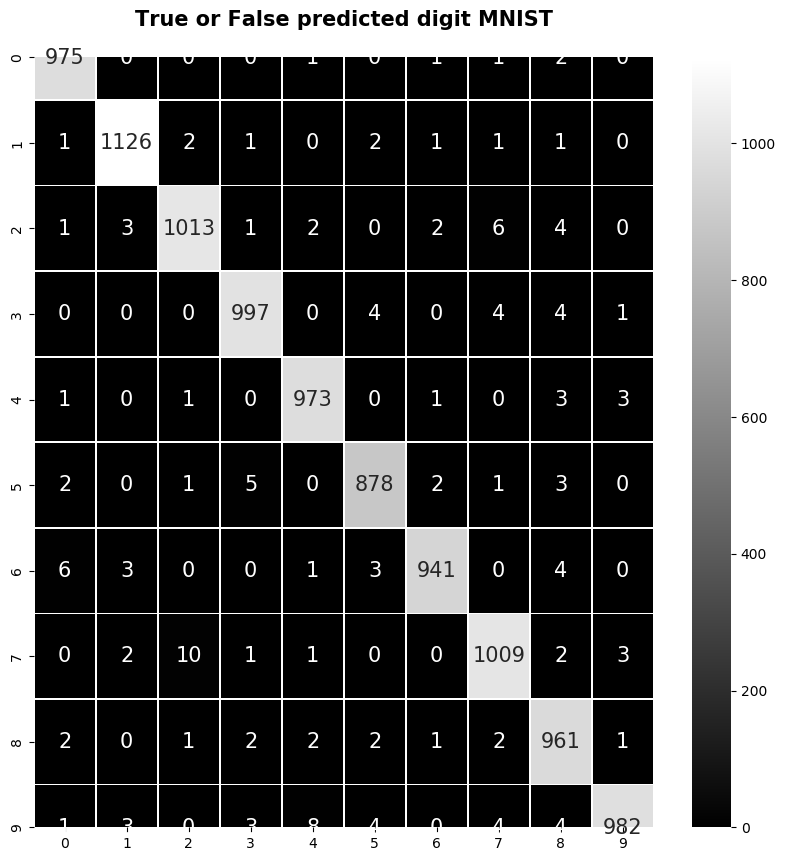

In [52]:
import seaborn as sns
import matplotlib .pyplot as plt
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



6


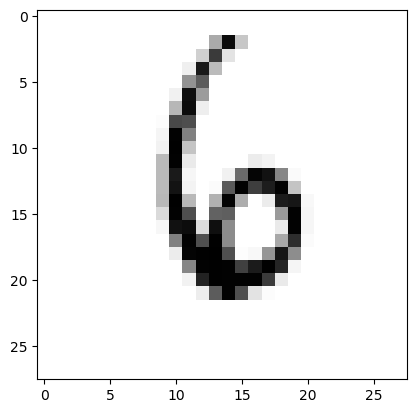

In [55]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())